# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered:

**Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

In this project, I will analysis the data and answer this question by using the dataset provided by FiveThirtyEight. They surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

### Summary of results
- In general, Star Wars: Episode V The Empire Strikes Back is the star wars movie with the highest average rankingfollowing by Star Wars: Episode VI Return of the Jedi and Star Wars: Episode IV A New Hope. 
- In general, The lowest ranked star wars movie is Star Wars: Episode III Revenge of the Sith.
- Star Wars: Episode V The Empire Strikes Back is also the star wars movie with the highest view counts, following by the Star Wars: Episode VI Return of the Jedi. 
- The Star Wars: Episode III Revenge of the Sith has the lowest view counts.
- Star wars fans give in average lower rankings than non star wars fans for the first 3 star wars movies (Episode I to III).
- Star wars fans give in average higher rankings than non star wars fans for the latest 3 star wars movies (Episode IV to VI).
- Non Star Trek fans give higher rankings for Episode I and II than Star Trek fans.
- Non Star Trek fans give lower rankings for Episode IV and VI than Star Trek fans.
- Male respondents give higher rankings for Episode III, IV and VI than female respondents.
- Male respondents give lower rankings for Episode I and II than female respondents

## Reading in Data

In [229]:
# read in data
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1') # use 'ISO-8559-1 because some of the characters are not utf-8 encoding

# explore data
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

## Removing rows with null in ResponendID
RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. Any rows with an invalid RespondentID will be removed.

In [230]:
# remove rows which contain null value in ResponendID
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

#confirm results
print(pd.isnull(star_wars['RespondentID']).value_counts())

False    1186
Name: RespondentID, dtype: int64


## Converting Yes/No values to boolean
For columns 2 and 3, the value Yes/No will be converted to boolean for easlier work. 

In [231]:
# create map for conversion
yes_no = {
    'Yes': True,
    'No' : False
}

# convert values in columns
star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

# confirm results
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Renaming and converting value for columns 3 to 8
For column 3 to 8, the columns respresent if the respondents have watch the star war movies. The moive name in the value respresnt that the respondents have watched that movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. it's assume that they didn't see the movie.

These columns will be converted to boolean and the columns will be renamed to seen_i. e.g. cplumn seen_1 incicates if the respindent has seen the first star war movie.

In [232]:
# extract movie names 
movie_names = star_wars.iloc[0,3:9].tolist()
print(movie_names)

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


In [233]:
import numpy as np
# create map for conversion
movie_map = {movie : True for movie in movie_names}
movie_map[np.nan] = False

# convert value
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_map)

# rename columns
i = 1
for col in star_wars.columns[3:9]:
    star_wars = star_wars.rename(columns = {col : 'seen_{}'.format(i)})
    i = i + 1

# confirm results
star_wars.iloc[:, 3:9]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


## Renaming and converting value for columns 9 to 14
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

The columns will be converted to a numeric type and the columns will be renamed to rank_i. e.g. column rank_1 shows the rank of first star war moive.


In [234]:
# convert columns 9-14 to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename columns
i = 1
for col in star_wars.columns[9:15]:
    star_wars = star_wars.rename(columns = {col : 'rank_{}'.format(i)})
    i = i + 1
    
# confirm results
star_wars.iloc[:, 9:15]

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


## Movie with the highest rank
In this session, the highest-ranked movie will be found by calculating the mean of each of the ranking columns. 1 being the favorite film in the franchise and 6 being the least favorite film.

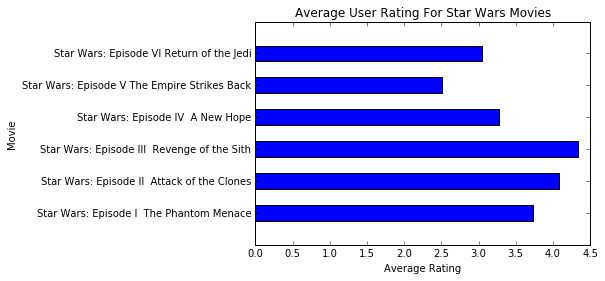

In [235]:
% matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange

# set plot properties
tick_positions = range(1,7) 
plt.barh(arange(6)+0.75, star_wars[star_wars.columns[9:15]].mean(), 0.5)
plt.yticks(tick_positions, movie_names)
plt.ylabel("Movie")
plt.xlabel("Average Rating")
plt.title("Average User Rating For Star Wars Movies")

# show plot
plt.show()

It shows that Star Wars: Episode V The Empire Strikes Back is the star wars movie with the highest average ranking (lowest in number), following by Star Wars: Episode VI Return of the Jedi and Star Wars: Episode IV A New Hope. The lowest ranked star wars movie is Star Wars: Episode III Revenge of the Sith.

## Movie with the highest view counts

In this session, the movie with the highest view count will be found by calculating the sum of the view count of each movie.

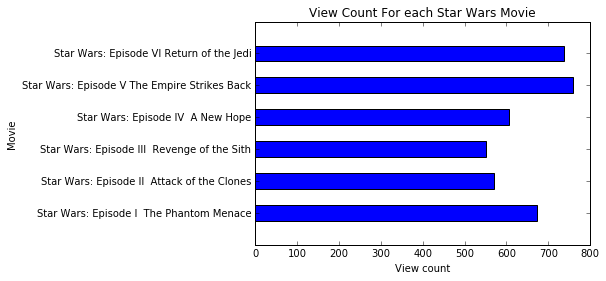

In [236]:
# set plot properties
plt.barh(arange(6)+0.75, star_wars[star_wars.columns[3:9]].sum(), 0.5)
plt.yticks(tick_positions, movie_names)
plt.ylabel("Movie")
plt.xlabel("View count")
plt.title("View Count For each Star Wars Movie")

# show plot
plt.show()

It can be found that Star Wars: Episode V The Empire Strikes Back is the star wars movie with the highest view counts, following by the Star Wars: Episode VI Return of the Jedi. The Star Wars: Episode III Revenge of the Sith has the lowest view counts.

## Analysing Data for different groups
In this session, the data will be separated into groups (Star wars fan: Yes/No; Star Trek fan: Yes/No; Gender: Male/Female). The ranking and the view counts will be computed for the subsets.

### Star wars fan: Yes/No:

In [237]:
### sperate data to subsets
star_wars_fan = star_wars[star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_star_wars_fan = star_wars[star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

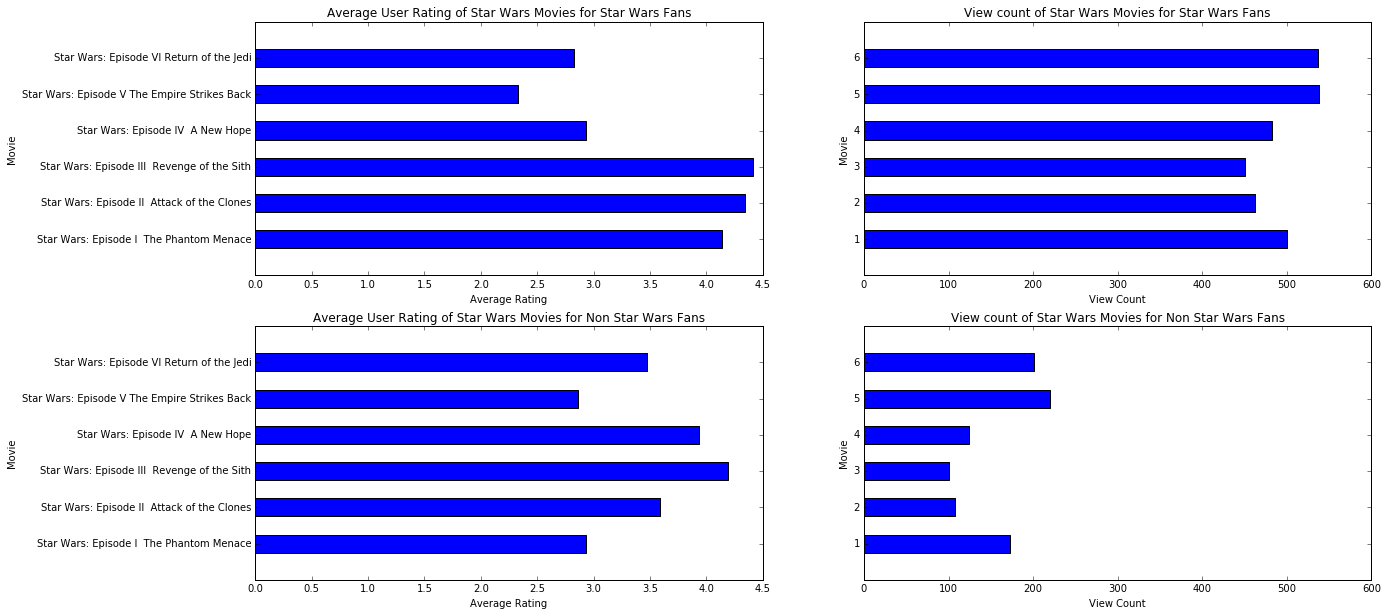

In [238]:
# create fig axes for plots
fig1 = plt.figure(figsize = (20,10))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4)

# set plot properties for User Rating of star wars fans
tick_positions = range(1,7) 
ax1.barh(arange(6)+0.75, star_wars_fan[star_wars_fan.columns[9:15]].mean(), 0.5)
ax1.set_yticklabels(movie_names)
ax1.set_yticks(tick_positions)
ax1.set_ylabel("Movie")
ax1.set_xlabel("Average Rating")
ax1.set_title("Average User Rating of Star Wars Movies for Star Wars Fans")

# set plot properties for view counts of star wars fans
tick_positions = range(1,7) 
ax2.barh(arange(6)+0.75, star_wars_fan[star_wars_fan.columns[3:9]].sum(), 0.5)
ax2.set_yticks(tick_positions)
ax2.set_ylabel("Movie")
ax2.set_xlabel("View Count")
ax2.set_title("View count of Star Wars Movies for Star Wars Fans")

# set plot properties for User Rating of non star wars fans
tick_positions = range(1,7) 
ax3.barh(arange(6)+0.75, non_star_wars_fan[non_star_wars_fan.columns[9:15]].mean(), 0.5)
ax3.set_yticklabels(movie_names)
ax3.set_yticks(tick_positions)
ax3.set_ylabel("Movie")
ax3.set_xlabel("Average Rating")
ax3.set_title("Average User Rating of Star Wars Movies for Non Star Wars Fans")

# set plot properties for view counts of non star wars fans
tick_positions = range(1,7) 
ax4.barh(arange(6)+0.75, non_star_wars_fan[non_star_wars_fan.columns[3:9]].sum(), 0.5)
ax4.set_yticks(tick_positions)
ax4.set_xlim(0,600)  # set x limit for same scale
ax4.set_ylabel("Movie")
ax4.set_xlabel("View Count")
ax4.set_title("View count of Star Wars Movies for Non Star Wars Fans")

# show plot
plt.show()

There are some interesting findings:
- For the first 3 star wars movies (Episode I to III), star wars fans give in average lower rankings than non star wars fans.
- For the latest 3 star wars movies (Episode IV to VI), star wars fans give in average higher rankings than non star wars fans.
- Both star wars fans and non star wars fans think that Episode V is the highest ranked star wars movie.
- Both star wars fans and non star wars fans think that Episode III is the lowest ranked star wars movie.

### Star Trek fan: Yes/No:

In [239]:
# sperate data to subsets
star_trek_fan = star_wars[star_wars[
    'Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
non_star_trek_fan = star_wars[star_wars[
    'Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

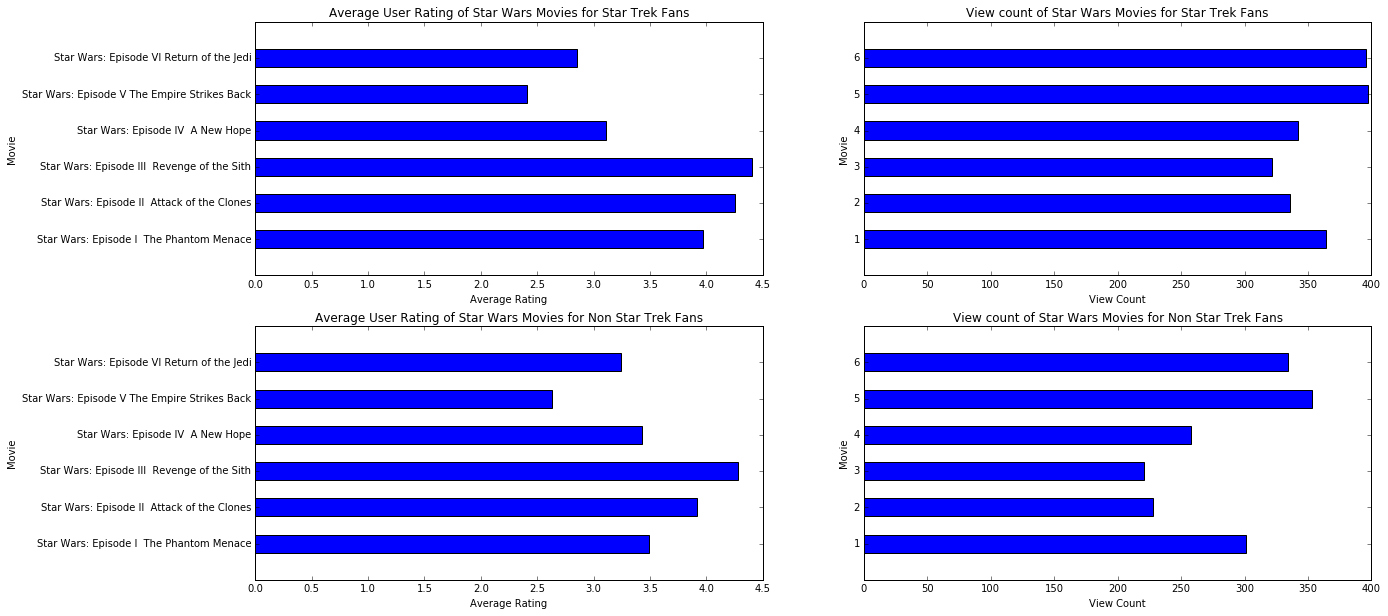

In [240]:
# create fig axes for plots
fig2 = plt.figure(figsize = (20,10))
ax1 = fig2.add_subplot(2,2,1)
ax2 = fig2.add_subplot(2,2,2)
ax3 = fig2.add_subplot(2,2,3)
ax4 = fig2.add_subplot(2,2,4)

# set plot properties for User Rating of star trek fans
tick_positions = range(1,7) 
ax1.barh(arange(6)+0.75, star_trek_fan[star_trek_fan.columns[9:15]].mean(), 0.5)
ax1.set_yticklabels(movie_names)
ax1.set_yticks(tick_positions)
ax1.set_ylabel("Movie")
ax1.set_xlabel("Average Rating")
ax1.set_title("Average User Rating of Star Wars Movies for Star Trek Fans")

# set plot properties for view counts of star trek fans
tick_positions = range(1,7) 
ax2.barh(arange(6)+0.75, star_trek_fan[star_trek_fan.columns[3:9]].sum(), 0.5)
ax2.set_yticks(tick_positions)
ax2.set_ylabel("Movie")
ax2.set_xlabel("View Count")
ax2.set_title("View count of Star Wars Movies for Star Trek Fans")

# set plot properties for User Rating of non star trek fans
tick_positions = range(1,7) 
ax3.barh(arange(6)+0.75, non_star_trek_fan[non_star_trek_fan.columns[9:15]].mean(), 0.5)
ax3.set_yticklabels(movie_names)
ax3.set_yticks(tick_positions)
ax3.set_ylabel("Movie")
ax3.set_xlabel("Average Rating")
ax3.set_title("Average User Rating of Star Wars Movies for Non Star Trek Fans")

# set plot properties for view counts of non star trek fans
tick_positions = range(1,7) 
ax4.barh(arange(6)+0.75, non_star_trek_fan[non_star_trek_fan.columns[3:9]].sum(), 0.5)
ax4.set_yticks(tick_positions)
ax4.set_xlim(0,400)  # set x limit for same scale
ax4.set_ylabel("Movie")
ax4.set_xlabel("View Count")
ax4.set_title("View count of Star Wars Movies for Non Star Trek Fans")

# show plot
plt.show()

It can be found that:
- Non Star Trek fans give higher rankings for Episode I and II than Star Trek fans.
- Non Star Trek fans give lower rankings for Episode IV and VI than Star Trek fans.

### Gender: Male/Female

In [241]:
# sperate data to subsets
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

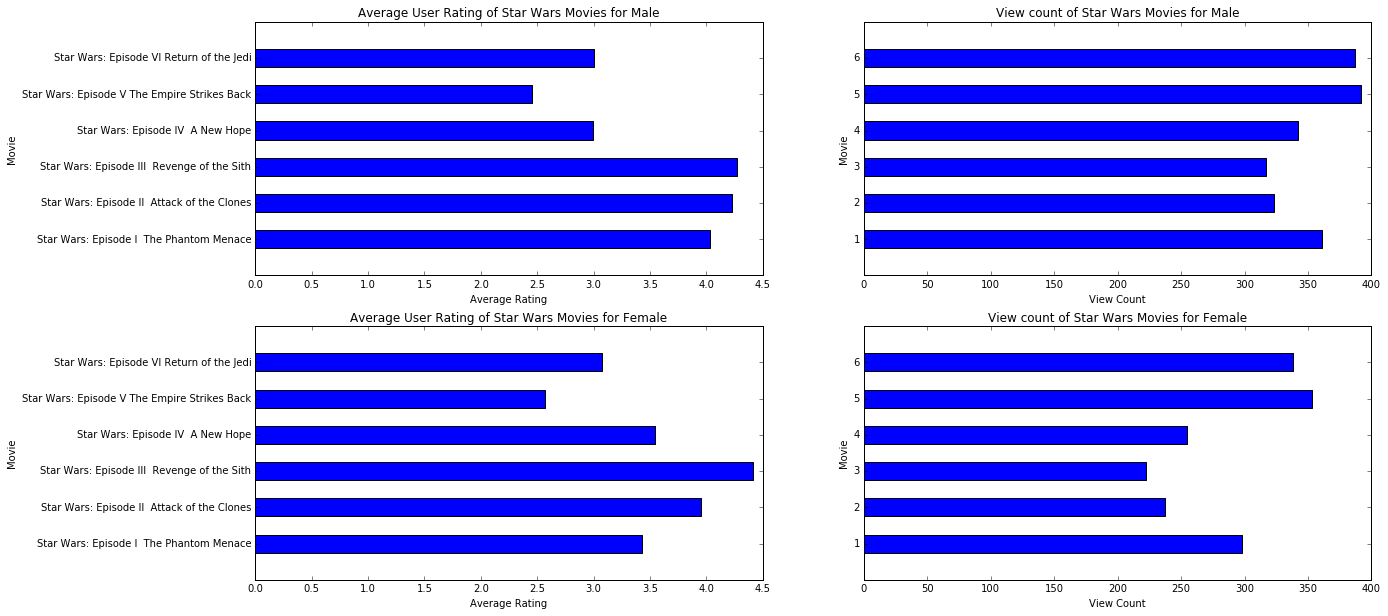

In [242]:
# create fig axes for plots
fig3 = plt.figure(figsize = (20,10))
ax1 = fig3.add_subplot(2,2,1)
ax2 = fig3.add_subplot(2,2,2)
ax3 = fig3.add_subplot(2,2,3)
ax4 = fig3.add_subplot(2,2,4)

# set plot properties for User Rating of star trek fans
tick_positions = range(1,7) 
ax1.barh(arange(6)+0.75, male[male.columns[9:15]].mean(), 0.5)
ax1.set_yticklabels(movie_names)
ax1.set_yticks(tick_positions)
ax1.set_ylabel("Movie")
ax1.set_xlabel("Average Rating")
ax1.set_title("Average User Rating of Star Wars Movies for Male")

# set plot properties for view counts of star trek fans
tick_positions = range(1,7) 
ax2.barh(arange(6)+0.75, male[male.columns[3:9]].sum(), 0.5)
ax2.set_yticks(tick_positions)
ax2.set_ylabel("Movie")
ax2.set_xlabel("View Count")
ax2.set_title("View count of Star Wars Movies for Male")

# set plot properties for User Rating of non star trek fans
tick_positions = range(1,7) 
ax3.barh(arange(6)+0.75, female[female.columns[9:15]].mean(), 0.5)
ax3.set_yticklabels(movie_names)
ax3.set_yticks(tick_positions)
ax3.set_ylabel("Movie")
ax3.set_xlabel("Average Rating")
ax3.set_title("Average User Rating of Star Wars Movies for Female")

# set plot properties for view counts of non star trek fans
tick_positions = range(1,7) 
ax4.barh(arange(6)+0.75, female[female.columns[3:9]].sum(), 0.5)
ax4.set_yticks(tick_positions)
ax4.set_xlim(0,400)  # set x limit for same scale
ax4.set_ylabel("Movie")
ax4.set_xlabel("View Count")
ax4.set_title("View count of Star Wars Movies for Female")

# show plot
plt.show()

We can see that:
- Male respondents give higher rankings for Episode III, IV and VI than female respondents.
- Male respondents give lower rankings for Episode I and II than female respondents.

## Interim conclusion:
In this project, so far I have analysed the ranking and view count of the star wars movies. I also separated the data into different subsets for further analysis. The findings are following:

- In general, Star Wars: Episode V The Empire Strikes Back is the star wars movie with the highest average rankingfollowing by Star Wars: Episode VI Return of the Jedi and Star Wars: Episode IV A New Hope. 
- In general, The lowest ranked star wars movie is Star Wars: Episode III Revenge of the Sith.
- Star Wars: Episode V The Empire Strikes Back is also the star wars movie with the highest view counts, following by the Star Wars: Episode VI Return of the Jedi. 
- The Star Wars: Episode III Revenge of the Sith has the lowest view counts.
- Star wars fans give in average lower rankings than non star wars fans for the first 3 star wars movies (Episode I to III).
- Star wars fans give in average higher rankings than non star wars fans for the latest 3 star wars movies (Episode IV to VI).
- Non Star Trek fans give higher rankings for Episode I and II than Star Trek fans.
- Non Star Trek fans give lower rankings for Episode IV and VI than Star Trek fans.
- Male respondents give higher rankings for Episode III, IV and VI than female respondents.
- Male respondents give lower rankings for Episode I and II than female respondents.

## Further studies
In next step, I am going to analyse the data and find out the answers of following questions:
- Aan data based on columns like Education, Location (Census Region)
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?